## Introduction 

In this study we are using Python 3 environment to create a machine learning models and to recommend the suitable type of crop that the farmer should grow in his farm. In this research Crop recommendation is done by considering different weather parameters and soil parameters. 

Proper crop selection results in increasing the yield and quality of crop.

## Import the Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score

## Load The Dataset

In [2]:
df=pd.read_csv('Crop_recommendation (New).csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Understanding the Data 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2109 non-null   int64  
 1   P            2109 non-null   int64  
 2   K            2109 non-null   int64  
 3   temperature  2109 non-null   float64
 4   humidity     2109 non-null   float64
 5   ph           2109 non-null   float64
 6   rainfall     2109 non-null   float64
 7   label        2109 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 131.9+ KB


In [5]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000
mean,50.540066,53.477477,48.290185,25.588128,71.466269,6.463961,103.364288
std,37.025645,33.199688,51.118720,5.091411,22.225064,0.772922,54.459032
min,0.000000,5.000000,5.000000,8.825675,14.273280,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.730313,60.268542,5.959493,64.727971
50%,37.000000,51.000000,31.000000,25.550370,80.471527,6.420019,95.170281
75%,84.000000,68.000000,48.000000,28.558525,89.901470,6.924491,124.413504
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
df.shape

(2109, 8)

***Dataset Info:-***

There are total 2109 rows and 8 columns in dataset.

*Column Details:-*

1. N :- Nitrogen level in soil.
2. P :- Phosphorus level in soil.
3. K :- Potassium level in soil.
4. Temperature :- Temperature in the farm area.
5. Humidity :- Humidity level in the farm area.
6. ph :- Soil ph level.
7. Rainfall :- Rainfall in farm area.
8. Label:- Type of crop.

*Independent variables* --> 'N', 'P','K', 'Temperature', 'Humidity', 'ph' and 'Rainfall'

*Dependent variable* -->'Label' 

## Exploratory Data Analysis

In [7]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

The dataset does not have any null value.

C:\Users\kulka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kulka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kulka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

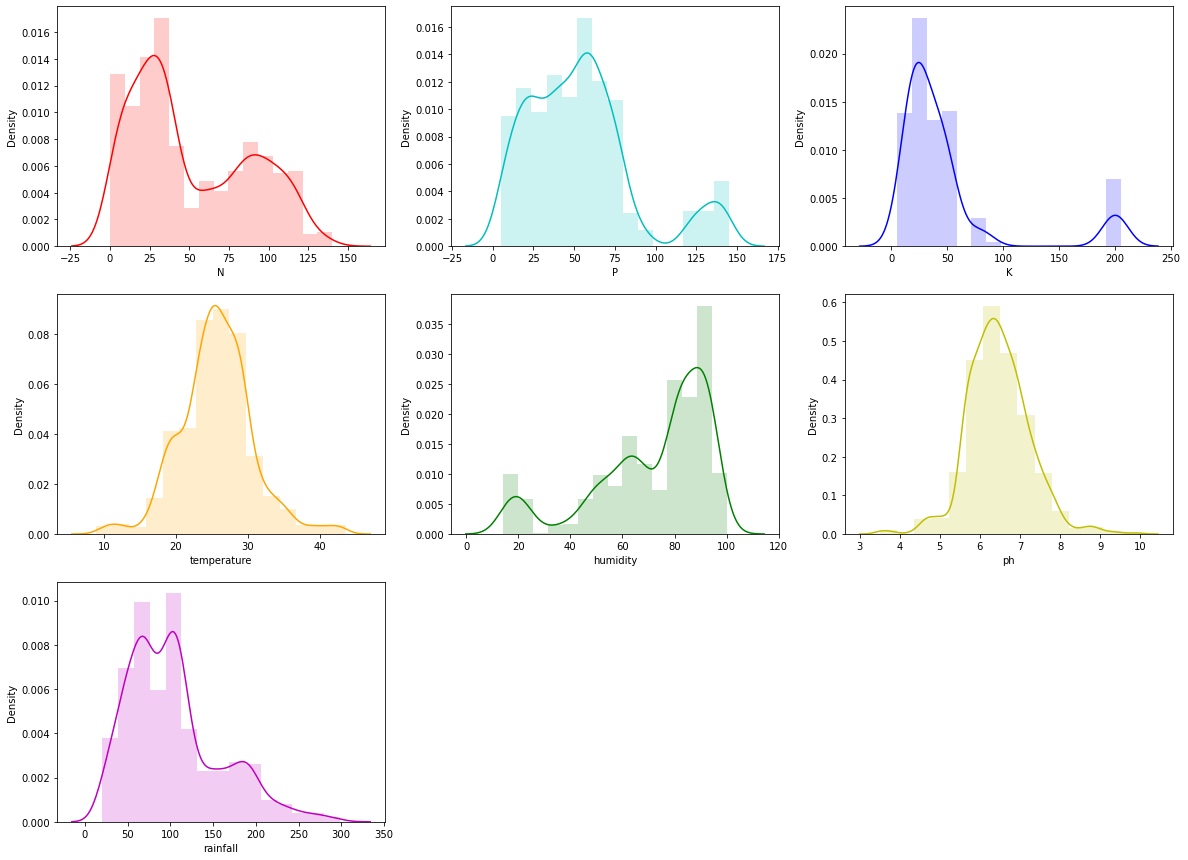

In [8]:
plt.figure(figsize=(20,15))

columns=['N','P','K','temperature','humidity','ph','rainfall']
color=['r','c','b','orange','g','y','m']

for i in range(0,7):
    plt.subplot(3,3,i+1)
    sns.distplot(df[columns[i]],color=color[i],bins=15,hist_kws={'alpha':0.2})

plt.show()

**From the above subplot following observations are made.**

* Temprature and ph both data are following bell shape and looks more balanced as compared to other data.

* Nitrogen data is more balanced between the range 0 to 50. The crops like grapes, apple, cotton and coffee requires N level more than 100.

* Phosphorus data is more balanced between the range 0 to 100. The crops like grapes and apple requires P level more than 100.

* Potassium data is more balanced between the range 0 to 100. The crops like grapes and apple requires K level more than 150.

* Humidity data is more balanced between the range 60 to 100. The crops like chickpea and kidneybeans requires humidity less than 30%.


**Note:-**
Soil and weather condition requirements varies as per the different types of crops. Hence the data which is not following bell shape ,we can't say it's an outlier.

In [9]:
df['label'].unique() #Different types of crops mentioned in the dataset

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
crops = df['label'].value_counts()
crops= pd.DataFrame(crops)
crops

,label
cotton,99
coffee,98
apple,98
pigeonpeas,98
blackgram,98
grapes,98
kidneybeans,97
lentil,97
coconut,97
maize,97


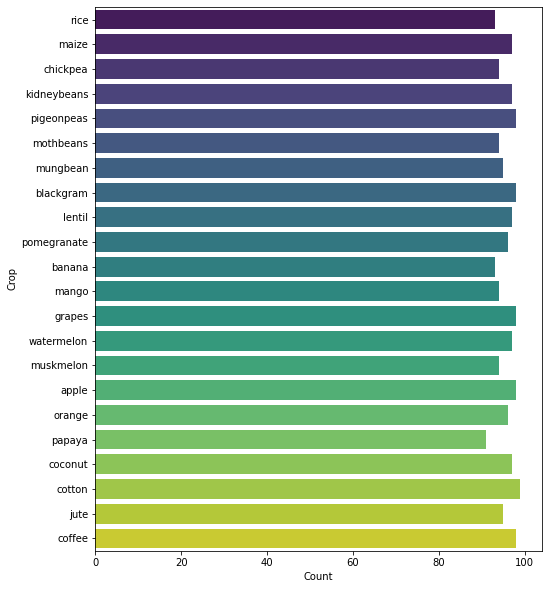

In [11]:
plt.figure(figsize=(8,10)) 
sns.countplot(y='label',data=df,palette="viridis")
plt.xlabel('Count')
plt.ylabel('Crop')
plt.show()


From the countplot we can say, number of enteries for different crop types are almost same.

### Correlation

Correlation helps us to investigate and establish relationships between the variables.

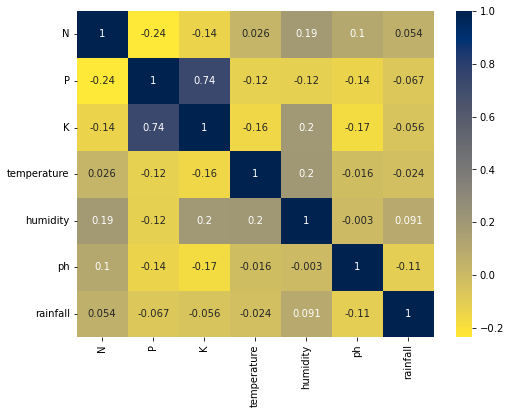

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='cividis_r')
plt.show()

**How to read correlation matrix:-**

* Correlation coefficient ranges from -1 to +1.


* Sign(+/-) indicate the direction and amount indicate the strength of correlation.


* +1.00 means perfect positive relationship.


* 0.00 means no relationship.


* -1.00 means perfect negative relationship.




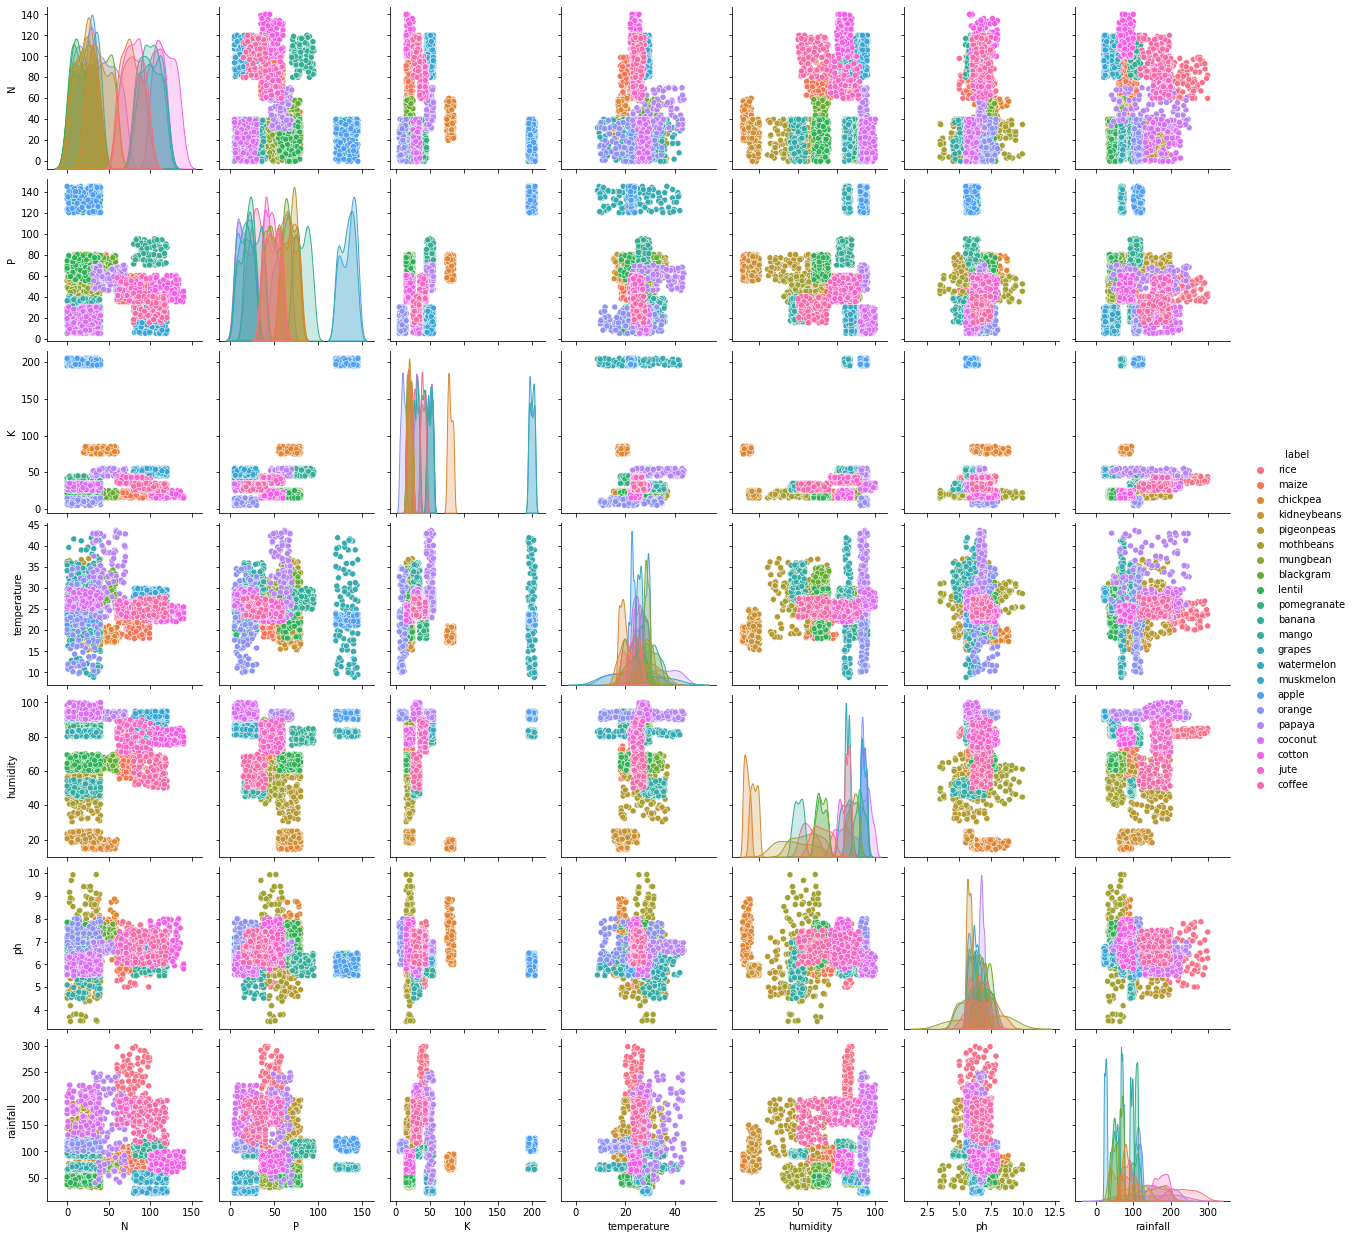

In [13]:
sns.pairplot(df, kind='scatter', hue='label');

## Splitting Dataset 

In [14]:
X=df.iloc[:,0:7]
y=df['label']

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

**Create test and train dataset:-**

The datset is split in the ratio of 7:3 for training and testing.

*Training Dataset:-* X_train, y_train

*Testing Dataset:-* X_test, y_test

In [16]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ',  X_test.shape)
print('y_test shape: ',  y_test.shape)

X_train shape:  (1476, 7)
y_train shape:  (1476,)
X_test shape:  (633, 7)
y_test shape:  (633,)


In [17]:
accuracy=[]
model=[]

## Machine Learning Models

## 1. Decision Tree 

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train,y_train)

print('Training Accuracy:- ', dt.score(X_train,y_train))
print('Testing Accuracy:- ',dt.score(X_test,y_test))

Training Accuracy:-  1.0
Testing Accuracy:-  0.981042654028436


In [19]:
y_pred=dt.predict(X_test)

In [20]:
result=classification_report(y_test,y_pred)
print(result)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       0.96      1.00      0.98        27
   blackgram       1.00      0.94      0.97        35
    chickpea       1.00      0.97      0.98        33
     coconut       1.00      0.97      0.98        29
      coffee       0.97      1.00      0.98        29
      cotton       1.00      1.00      1.00        30
      grapes       1.00      1.00      1.00        29
        jute       0.82      0.90      0.86        30
 kidneybeans       1.00      1.00      1.00        32
      lentil       1.00      1.00      1.00        42
       maize       0.97      1.00      0.98        31
       mango       1.00      1.00      1.00        25
   mothbeans       0.96      1.00      0.98        25
    mungbean       1.00      1.00      1.00        27
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        32
      papaya       0.96    

In [21]:
model.append('Decision Tree')
accuracy.append(accuracy_score(y_test,y_pred))

## 2. KNN 

In [22]:
from sklearn.neighbors import KNeighborsClassifier
score=[]
for i in range (1,20):
    knn=KNeighborsClassifier(n_neighbors=i,weights='uniform')
    knn.fit(X_train,y_train)
    score.append(knn.score(X_test,y_test))

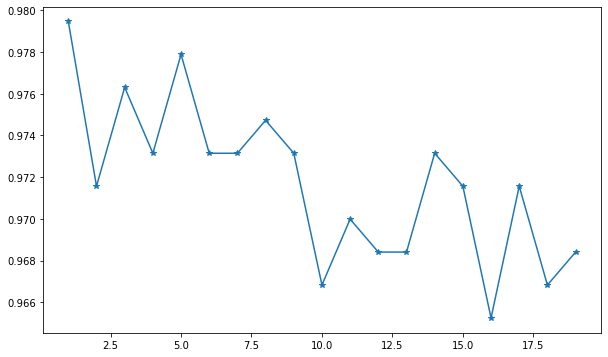

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),score,marker='*');

From the above lineplot the best suited K value is found out to be 5.

In [24]:
knn=KNeighborsClassifier(n_neighbors=5,weights='uniform')
knn.fit(X_train,y_train)

print('Training Accuracy:- ', knn.score(X_train,y_train))
print('Testing Accuracy:- ',knn.score(X_test,y_test))

Training Accuracy:-  0.986449864498645
Testing Accuracy:-  0.9778830963665087


In [25]:
y_pred=knn.predict(X_test)

In [26]:
result=classification_report(y_test,y_pred)
print(result)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        27
   blackgram       1.00      1.00      1.00        35
    chickpea       1.00      1.00      1.00        33
     coconut       1.00      1.00      1.00        29
      coffee       1.00      0.97      0.98        29
      cotton       0.94      1.00      0.97        30
      grapes       1.00      1.00      1.00        29
        jute       0.81      0.87      0.84        30
 kidneybeans       0.97      1.00      0.98        32
      lentil       1.00      1.00      1.00        42
       maize       1.00      0.94      0.97        31
       mango       1.00      1.00      1.00        25
   mothbeans       1.00      1.00      1.00        25
    mungbean       1.00      1.00      1.00        27
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        32
      papaya       1.00    

In [27]:
model.append('KNN')
accuracy.append(accuracy_score(y_test,y_pred))

## 3. Random Forest 

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=4, random_state=10)
rf.fit(X_train,y_train)

print('Training Accuracy:- ', rf.score(X_train,y_train))
print('Testing Accuracy:- ',rf.score(X_test,y_test))

Training Accuracy:-  0.978319783197832
Testing Accuracy:-  0.9684044233807267


In [29]:
y_pred=rf.predict(X_test)

In [30]:
result=classification_report(y_test,y_pred)
print(result)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        27
   blackgram       1.00      0.94      0.97        35
    chickpea       1.00      1.00      1.00        33
     coconut       1.00      1.00      1.00        29
      coffee       0.97      1.00      0.98        29
      cotton       1.00      1.00      1.00        30
      grapes       1.00      1.00      1.00        29
        jute       0.85      0.97      0.91        30
 kidneybeans       1.00      1.00      1.00        32
      lentil       1.00      0.71      0.83        42
       maize       0.97      1.00      0.98        31
       mango       1.00      1.00      1.00        25
   mothbeans       0.66      1.00      0.79        25
    mungbean       1.00      1.00      1.00        27
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        32
      papaya       1.00    

In [31]:
model.append('Random Forest')
accuracy.append(accuracy_score(y_test,y_pred))

In [32]:
for i in range(len(model)):
    print(model[i]+' = '+str(accuracy[i]))

Decision Tree = 0.981042654028436
KNN = 0.9778830963665087
Random Forest = 0.9684044233807267


**Among all three classification models, decision tree algorithm showed best result.**